## Procedure（8/30/2021）

1. Once: Create an ipynb file in the `Colab Notebooks` folder in `My Drive` (currently open file).

2. Once: Create an `Oda_etal_R` folder in `My Drive` and place the original data of the Excel file.

3. Mount Google Drive.

4. Run the following code to create the graph. The installed R package will be removed when the runtime is disconnected, so you will need to reinstall it each time you reconnect.

  ・Run the magic commands and install R packages.

  ・Define functions and draw the graph.

  ・Save the graph (comment it out when not in use).


## Use R and Python together in Google colaboratory


In [ ]:
# Use R and Python together in Google Colab #######################################
# Run rmagic in notebook
%load_ext rpy2.ipython

In [ ]:
import os
os.getcwd()

'/content'

## R: Install packages

In [ ]:
# Install R packages

%%R
install.packages("cowplot")
install.packages("patchwork")
install.packages('dplyr')
install.packages("ggsignif")
install.packages("multcomp")
install.packages("ggplot2")
install.packages('Rmisc')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/cowplot_1.1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1353271 bytes (1.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [ ]:
%%R
# Install additional R package using in barplot
install.packages('ggpubr',lib='/usr/lib/R/site-library')

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘gridExtra’, ‘polynom’, ‘rstatix’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.60.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 200374 bytes (195 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

## R: Functions difinition for two types of boxplot


In [ ]:

# Functions difinition for two types of boxplot ####################################
%%R
library(ggplot2)
library(multcomp)
library(ggsignif) 
library(cowplot) 
library(patchwork)
library(dplyr)
library(Rmisc)
library(ggpubr)


# makePlot_ver1 for usual boxplot
makePlot_ver1 <- function(dt,csv_columns_name,yaxis_max,label_fontsize,color_c_box){
  # Get x-label names from csv in 'columns_csv'
  x <- read.csv(csv_columns_name, header=TRUE)
  x2 <- x[,2]
  csv_columns <- c(x2)
  # Make boxplot with jitter using ggplot2 package
  g = ggplot(dt, aes(x=variable, y=value))+
  stat_boxplot(geom = "errorbar",color="black",lwd=0.3,width=0.3)+
  # Filling boxplot with custom colors
  geom_boxplot(data=dt,aes(variable, value,fill=variable),width=0.5,color="black",lwd=0.3,outlier.colour = NA)+
  geom_jitter(data=dt,aes(variable, value, fill=variable, alpha=0.7),stroke = 0.15,lwd=rel(2),shape=21,position=position_jitter(width=0.2,height=0))+
  scale_x_discrete(limits=csv_columns)+
  # Setting y-axis limit
  scale_y_continuous(limits=c(0,yaxis_max))

  # Setting theme
  graph <- g+
  theme_classic(base_size = 11)+
  theme(axis.line = element_line(colour="black",size=0.15))+
  theme(axis.ticks = element_line(size=0.15))+
  theme(axis.ticks.x = element_blank(),axis.text.x = element_text(angle = 90,size = label_fontsize,hjust = 1), axis.text.y = element_text(size = 10))+
  theme(plot.title = element_text(size = 8))+
  theme(legend.position='none')+
  scale_fill_manual(values = color_c_box)+
  ggtitle(csv_name)
  csv_name_woCsv = sub(".csv", "", csv_name)
  return(graph)}

# makePlot_ver2 for boxplot using grouped data
makePlot_ver2 <- function(dt,csv_columns_name,yaxis_max,label_fontsize,color_c_jitter,color_c_box){
  library(dplyr)
  library(forcats)
  dt_running <- dt %>% 
  dplyr::mutate(group = forcats::fct_inorder(group))
  x <- read.csv(csv_columns_name, header=TRUE)
  x2 <- x[,2]
  csv_columns <- c(x2)
  # Make boxplot with jitter using ggplot2 package
  g = ggplot2::ggplot(dt_running,aes(variable, value, fill=interaction(variable, group),dodge=group)) +
  stat_boxplot(geom = "errorbar",color="black",width=1.3/length(unique(dt_running$group)),lwd=0.3,position = position_dodge(width = .6))+
  # Filling boxplot with custom colors
  geom_boxplot(color="black",width=1.3/length(unique(dt_running$group)),lwd = 0.3,position = position_dodge(width = .6),outlier.colour = NA)+
  geom_jitter(color="black",shape=21,lwd = rel(2.2),alpha=0.7,stroke = 0.15,position=position_jitterdodge(jitter.width = 0.5, jitter.height = 0, dodge.width = .6))+
  scale_x_discrete(limits=csv_columns)+
  # Setting y-axis limit
  scale_y_continuous(limits=c(0,yaxis_max))
  
  # Setting theme
  graph <- g+
  theme_classic(base_size = 11)+
  theme(axis.line = element_line(colour="black",size=0.15))+
  theme(axis.ticks = element_line(size=0.15))+
  theme(axis.ticks.x = element_blank(),axis.text.x = element_text(angle = 90,size = label_fontsize,hjust = 1), axis.text.y = element_text(size = 10))+
  theme(plot.title = element_text(size = 10))+
  theme(legend.position='none')+
  ggtitle(csv_name)
  return(graph)}


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: Loading required package: MASS

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser


R[write to console]: 
Attaching package: ‘patchwork’


R[write to console]: The following object is masked from ‘package:cowplot’:

    align_plots


R[write to console]: The following object is masked from ‘package:MASS’:

    area


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following object is masked from ‘package:MASS’:

    select


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: latti

## R: Functions difinition for barplot

In [ ]:
# Functions difinition for barplot ####################################

%%R

# makePlot_bar for barplot
makePlot_bar <- function(dt,csv_columns_name,yaxis_max,label_fontsize,color_c_box){
  library(ggplot2)
  library(Rmisc)
  library(dplyr)
  library(ggpubr)
  # Get x-label names from csv in 'columns_csv'
  x <- read.csv(csv_columns_name, header=TRUE)
  x2 <- x[,2]
  csv_columns <- c(x2)
  # Make barplot with jitter using ggplot2 package
  g = ggbarplot(dt, x = "variable", y = "value", add = c("mean_sd"), add.params = list(size=0.3,width=0.3),
    color="black",fill=color_c_box, position = position_dodge(0.8),width=0.5,lwd = 0.3)+
  geom_jitter(aes(x = variable, y = value, fill=variable, alpha=0.7),stroke = 0.15,lwd=rel(2),shape=21,position=position_jitter(width=0.2,height=0))+

  scale_x_discrete(limits=csv_columns)+
  # Setting y-axis limit
  scale_y_continuous(limits=c(0,yaxis_max),breaks=c(200000,400000,600000,800000),expand = c( 0, 0 ))
  #scale_y_continuous(limits=c(0,yaxis_max),expand = c( 0, 0 ))


  # Setting theme
  graph <- g+
  theme_classic(base_size = 11)+
  theme(axis.line = element_line(colour="black",size=0.15))+
  theme(axis.ticks = element_line(size=0.15))+
  theme(axis.ticks.x = element_blank(),axis.text.x = element_text(angle = 90,size = label_fontsize,hjust = 1), axis.text.y = element_text(size = 10))+
  theme(plot.title = element_text(size =8))+
  theme(legend.position='none')+
  scale_fill_manual(values = color_c_box)+
  ggtitle(csv_name)
  return(graph)}

In [ ]:
# Move to data folder
%cd /content/drive/'My Drive'/'Oda_etal_R'/


/content/drive/My Drive/Oda_etal_R


## Fig1

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



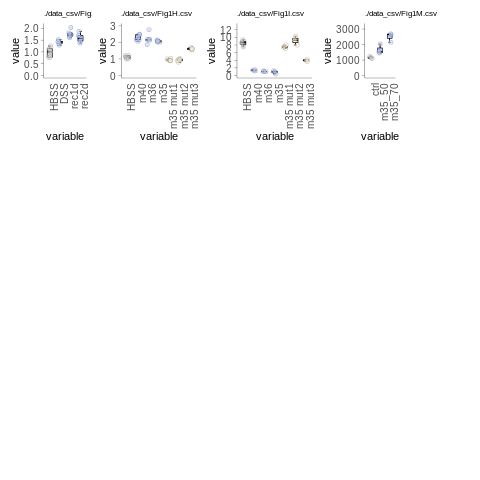

In [ ]:
# Fig1 ####################################


%%R
# Fig1E
csv_name = "./data_csv/Fig1E.csv"
dt1 <- read.csv(csv_name, header=T)
head(dt1)

# Setting the box colors
color_c_box = c('#BBCCFF', '#DDDDDD','#BBCCFF','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/Fig1E_columns.csv',2.1,10,color_c_box)


# Fig1H
csv_name = "./data_csv/Fig1H.csv"
dt2 <- read.csv(csv_name, header=T)
head(dt2)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD', '#BBCCFF','#fbf3d7','#fbf3d7', '#fbf3d7','#BBCCFF','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/Fig1H_columns.csv',3,10,color_c_box)


# Fig1I
csv_name = "./data_csv/Fig1I.csv"
dt3 <- read.csv(csv_name, header=T)
head(dt3)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD', '#BBCCFF','#fbf3d7','#fbf3d7', '#fbf3d7','#BBCCFF','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g3 <- makePlot_ver1(dt3,'./columns_csv/Fig1I_columns.csv',14,10,color_c_box)

g3 <- g3 + 
 # Increase number of y-axis ticks
  scale_y_continuous(n.breaks = 7,limits = c(0, 13))


# Fig1M
csv_name = "./data_csv/Fig1M.csv"
dt4 <- read.csv(csv_name, header=T)
head(dt4)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD', '#BBCCFF','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g4 <- makePlot_ver1(dt4,'./columns_csv/Fig1M_columns.csv',3200,10,color_c_box)


# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,g3,g4,ncol = 6,nrow=7,widths=c(1.4,2.45,2.45,1,1),heights=c(1,1,1,1,1,1))
plot(g)

# Save
#ggsave(filename = "fig1.pdf", plot=g, device="pdf", width=8.27, height=11.69, units="in")

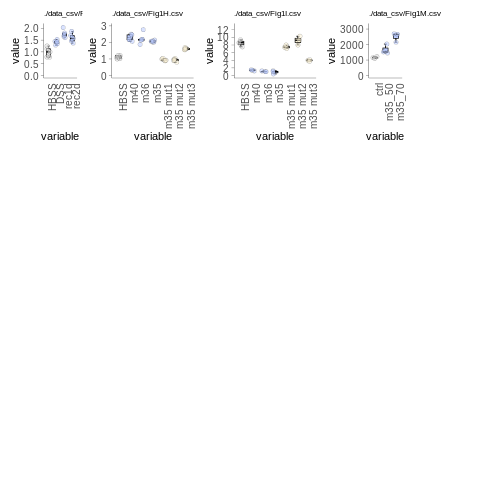

In [ ]:
%%R
# Different-sized version
g <- wrap_plots(g1,g2,g3,g4,ncol = 6,nrow=7,widths=c(1,2.45,2.45,1,1),heights=c(1,1,1,1,1,1))
plot(g)

# Save
#ggsave(filename = "fig1-2.pdf", plot=g, device="pdf", width=8.27, height=11.69, units="in")










## Fig.2

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



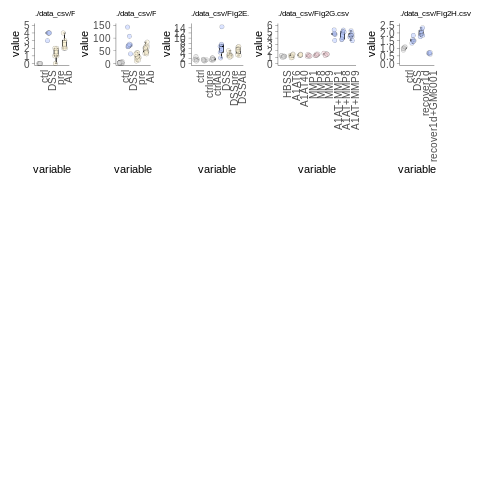

In [ ]:
# Fig2 ####################################


%%R
# Fig2C
csv_name = "./data_csv/Fig2C.csv"
dt1 <- read.csv(csv_name, header=T)


# Filling boxplot with custom colors
color_c_box = c('#fbf3d7','#DDDDDD','#BBCCFF','#fbf3d7')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/Fig2C_columns.csv',5,10,color_c_box)

# Fig2D
csv_name = "./data_csv/Fig2D.csv"
dt2 <- read.csv(csv_name, header=T)

# Filling boxplot with custom colors
color_c_box = c('#fbf3d7','#DDDDDD','#BBCCFF','#fbf3d7')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/Fig2D_columns.csv',150,10,color_c_box)

# Fig2E

csv_name = "./data_csv/Fig2E.csv"
dt3 <- read.csv(csv_name, header=T)
head(dt3)

# Setting the box colors
color_c_box = c('#DDDDDD', '#DDDDDD', '#DDDDDD', '#BBCCFF', '#fbf3d7', '#fbf3d7')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g3 <- makePlot_ver1(dt3,'./columns_csv/Fig2E_columns.csv',14.5,10,color_c_box)

# Increase number of y-axis ticks
g3 <- g3 + scale_y_continuous(n.breaks = 12,limits = c(0, 15))

# Fig2G
csv_name = "./data_csv/Fig2G.csv"
dt4 <- read.csv(csv_name, header=T)
head(dt4)

# Filling boxplot with custom colors
color_c_box = c('#BBCCFF', '#BBCCFF','#BBCCFF','#fbf3d7', '#fbf3d7','#DDDDDD','#f2d5db','#f2d5db','#f2d5db')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g4 <- makePlot_ver1(dt4,'./columns_csv/Fig2G_columns.csv',6,10,color_c_box)
# Increase number of y-axis ticks
g4 <- g4 + scale_y_continuous(n.breaks = 6,limits = c(0, 6))


# Fig2H
csv_name = "./data_csv/Fig2H.csv"
dt5 <- read.csv(csv_name, header=T)

# del HBSS data
dt5 = dt5[6:25,]
head(dt5)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD', '#BBCCFF','#BBCCFF','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g5 <- makePlot_ver1(dt5,'./columns_csv/Fig2H_columns.csv',2.5,10,color_c_box)




# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,g3,g4,g5,ncol = 6,nrow=8,widths=c(2,2,3,4.5,2),heights=c(1,1,1,1,1,1))
plot(g)

# Save
#ggsave(filename = "fig2.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")

##Fig.3

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



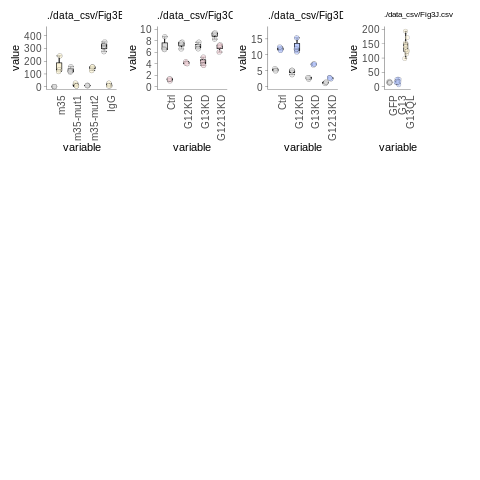

In [ ]:
# Fig3 ####################################

%%R

# Fig3B
csv_name = "./data_csv/Fig3B.csv"

dt1 <- read.csv(csv_name, header=T)
head(dt1)

# makePlot_ver2(dt,'***_columns.csv',yaxis_max,label_fontsize)
g1 <- makePlot_ver2(dt1,"./columns_csv/Fig3B_columns.csv",450,10)
# Filling boxplot with custom colors
g1 <- g1+
  scale_fill_manual(values=c("#DDDDDD","#DDDDDD","#DDDDDD","#DDDDDD"
                             ,"#fbf3d7","#fbf3d7","#fbf3d7","#fbf3d7"))
# Fig3C
csv_name = "./data_csv/Fig3C.csv"
dt2 <- read.csv(csv_name, header=T)

# makePlot_ver2(dt,'***_columns.csv',yaxis_max,label_fontsize)
g2 <- makePlot_ver2(dt2,'./columns_csv/Fig3C_columns.csv',13,10)
# Filling boxplot with custom colors
g2 <- g2+
  scale_fill_manual(values=c("#DDDDDD","#DDDDDD","#DDDDDD","#DDDDDD",
                             "#f2d5db","#f2d5db","#f2d5db","#f2d5db"))+
  # Increase number of y-axis ticks
  scale_y_continuous(n.breaks = 7,limits = c(0, 10))


# Fig3D
csv_name = "./data_csv/Fig3D.csv"
dt3 <- read.csv(csv_name, header=T)

# makePlot_ver2(dt,'***_columns.csv',yaxis_max,label_fontsize)
g3 <- makePlot_ver2(dt3,'./columns_csv/Fig3D_columns.csv',18,10)
# Filling boxplot with custom colors
g3 <- g3+
  scale_fill_manual(values=c("#DDDDDD","#DDDDDD","#DDDDDD","#DDDDDD",
                             "#BBCCFF","#BBCCFF","#BBCCFF","#BBCCFF"))+
  # Increase number of y-axis ticks
  scale_y_continuous(n.breaks = 6,limits = c(0, 18))

# Fig3F
csv_name = "./data_csv/Fig3F.csv"

dt4 <- read.csv(csv_name, header=T)
head(dt4)

csv_columns_name = "./columns_csv/Fig3F_columns.csv"

# Filling boxplot with custom colors
color_c_box = c('#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF',
                '#5D6680','#5D6680','#5D6680','#5D6680','#5D6680','#5D6680','#5D6680',
                '#95A3CC','#95A3CC','#95A3CC','#95A3CC','#95A3CC','#95A3CC','#95A3CC')

# makePlot_bar(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g4 <- makePlot_bar(dt4,csv_columns_name,950000,10,color_c_box)

# Fig3G
csv_name = "./data_csv/Fig3G.csv"
dt5 <- read.csv(csv_name, header=T)
head(dt5)
csv_columns_name = "./columns_csv/Fig3G_columns.csv"

# Filling boxplot with custom colors
color_c_box = c('#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#fbf3d7','#fbf3d7',
                '#fbf3d7','#fbf3d7','#fbf3d7','#e6bfae','#e6bfae','#e6bfae','#e6bfae',
                '#e6bfae','#eeffe8','#eeffe8','#eeffe8','#eeffe8','#eeffe8')

# makePlot_bar(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g5 <- makePlot_bar(dt5,csv_columns_name,950000,10,color_c_box)


# Fig3J
csv_name = "./data_csv/Fig3J.csv"
dt6 <- read.csv(csv_name, header=T)

# Filling boxplot with custom colors
color_c_box = c('#BBCCFF','#fbf3d7','#DDDDDD')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g6 <- makePlot_ver1(dt6,'./columns_csv/Fig3J_columns.csv',200,10,color_c_box)



# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,g3,g6,ncol = 5,nrow=6,widths=c(1.2,1.2,1.2,0.45,1),heights=c(0.8,0.8,0.8,0.8,0.8,0.8))
plot(g)

# Save
#ggsave(filename = "fig3-1.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")

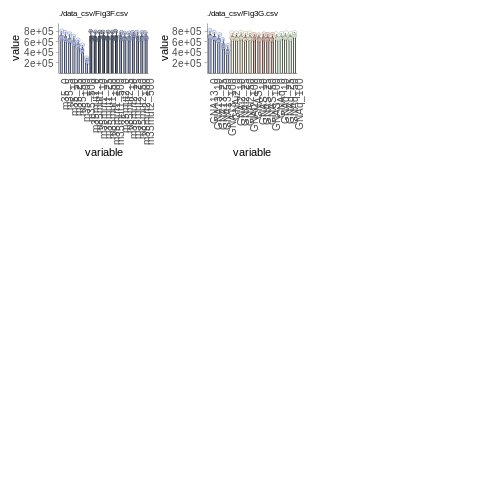

In [ ]:
%%R
# Draw
# Adjusting plots
g <- wrap_plots(g4,g5,ncol = 5,nrow=6,widths=c(2.2,2.2,1,1),heights=c(0.8,1,1,1,1,1))
plot(g)

# Save
#ggsave(filename = "fig3-2.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")

## Fig.4

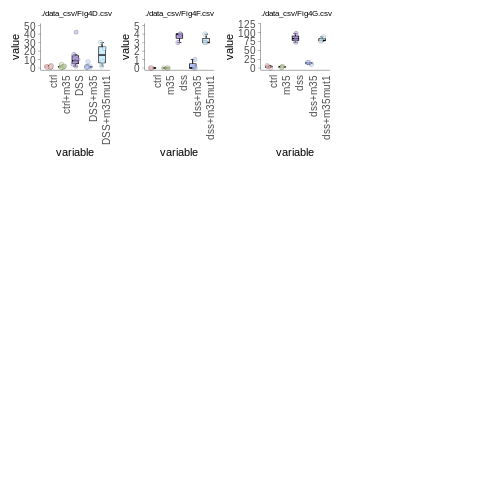

In [ ]:
# Fig4 ####################################

%%R
library(ggplot2)
# Fig4D
csv_name = "./data_csv/Fig4D.csv"

dt1 <- read.csv(csv_name, header=T)
head(dt1)

# Filling boxplot with custom colors
color_c_box = c('#FFCCCC','#CCDDAA','#b19cd9','#BBCCFF','#CCEEFF')


# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/Fig4D_columns.csv',50,10,color_c_box)

# Fig4F
csv_name = "./data_csv/Fig4F.csv"
dt2 <- read.csv(csv_name, header=T)
head(dt2)

# Filling boxplot with custom colors
color_c_box = c('#FFCCCC','#b19cd9','#BBCCFF','#CCEEFF','#CCDDAA')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/Fig4F_columns.csv',5,10,color_c_box)

# Fig4G
csv_name = "./data_csv/Fig4G.csv"
dt3 <- read.csv(csv_name, header=T)
head(dt3)

# Filling boxplot with custom colors
color_c_box = c('#FFCCCC','#b19cd9','#BBCCFF','#CCEEFF','#CCDDAA')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g3 <- makePlot_ver1(dt3,'./columns_csv/Fig4G_columns.csv',120,10,color_c_box)

# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,g3,ncol =5,nrow=7,widths=c(1,1,1,1,1),heights=c(0.9,1,1,1,1,1,1))
plot(g)

# Save
#ggsave(filename = "fig4.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")


# Fig.5

In [1]:
## Fig.5 ####################################
%%R
library(ggplot2)

# Fig5C
csv_name = "./data_csv/Fig5C.csv"
dt1 <- read.csv(csv_name, header=T)

# Filling boxplot with custom colors
color_c_box = c('#BBCCFF','#fbf3d7','#fbf3d7','#fbf3d7','#fbf3d7','#DDDDDD')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/Fig5C_columns.csv',3.4,10,color_c_box)

# Fig5D
csv_name = "./data_csv/Fig5D.csv"
dt2 <- read.csv(csv_name, header=T)


# Filling boxplot with custom colors
color_c_box = c('#BBCCFF','#fbf3d7','#fbf3d7','#fbf3d7','#fbf3d7','#DDDDDD')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/Fig5D_columns.csv',6.3,10,color_c_box)+
      # Increase number of y-axis ticks
      scale_y_continuous(n.breaks = 7,limits = c(0, 6.3))

# Fig5E
csv_name = "./data_csv/Fig5E.csv"

dt3 <- read.csv(csv_name, header=T)
head(dt3)

csv_columns_name = "./columns_csv/Fig5E_columns.csv"

# Filling boxplot with custom colors
color_c_box = c('#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF',
                '#5D6680','#5D6680','#5D6680','#5D6680','#5D6680','#5D6680','#5D6680',
                '#95A3CC','#95A3CC','#95A3CC','#95A3CC','#95A3CC','#95A3CC')

# makePlot_bar(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g3 <- makePlot_bar(dt3,csv_columns_name,300000,10,color_c_box)+
scale_y_continuous(n.breaks = 4,limits = c(0, 300000),expand = c( 0, 0 ))

# Fig5H
csv_name = "./data_csv/Fig5H.csv"
dt4 <- read.csv(csv_name, header=T)

# Filling boxplot with custom colors
color_c_box = c('#BBCCFF','#DDDDDD','#BBCCFF','#DDDDDD')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g4 <- makePlot_ver1(dt4,'./columns_csv/Fig5H_columns.csv',5,10,color_c_box)


# Fig5J
csv_name = "./data_csv/Fig5J.csv"
dt5 <- read.csv(csv_name, header=T)
head(dt5)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD', '#BBCCFF','#DDDDDD','#BBCCFF')

g5 <- makePlot_ver1(dt5,'./columns_csv/Fig5J_columns.csv',125,10,color_c_box)+
  # Increase number of y-axis ticks
  scale_y_continuous(n.breaks = 7,limits = c(0, 125))


# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,g3,g4,g5,ncol =7,nrow=7,widths=c(1.5,1.5,2,1,1,1,1),heights=c(0.8,1,1,1,1,1,1))
plot(g)
# Save
#ggsave(filename = "fig5.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")


UsageError: Cell magic `%%R` not found.


# FigS.1

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



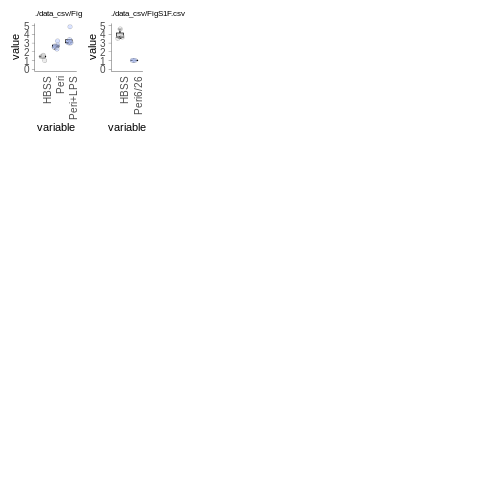

In [ ]:
# FigS1 ####################################

%%R
# FigS1E

csv_name = "./data_csv/FigS1E.csv"
dt1 <- read.csv(csv_name, header=T)
head(dt1)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/FigS1E_columns.csv',5,10,color_c_box)

# FigS1F
csv_name = "./data_csv/FigS1F.csv"
dt2 <- read.csv(csv_name, header=T)
head(dt2)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/FigS1F_columns.csv',5,10,color_c_box)
# Increase number of y-axis ticks
g2 <- g2 + 
  scale_y_continuous(n.breaks = 6,limits = c(0, 5))

# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,ncol =7,nrow=7,widths=c(0.4,0.3,1),heights=c(0.8,1,1))
plot(g)

# Save
#ggsave(filename = "figS1.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")


# FigS.2

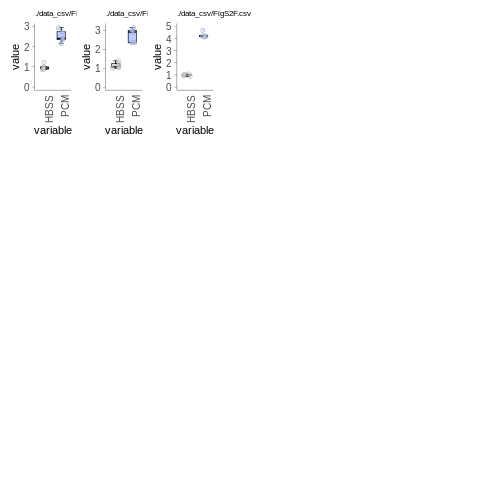

In [ ]:

# FigS2 ####################################

%%R
# FigS2B
csv_name = "./data_csv/FigS2B.csv"
dt1 <- read.csv(csv_name, header=T)
head(dt1)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/FigS2B_columns.csv',3,10,color_c_box)

# FigS2D

csv_name = "./data_csv/FigS2D.csv"
dt2 <- read.csv(csv_name, header=T)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/FigS2D_columns.csv',3.2,10,color_c_box)


# FigS2F
csv_name = "./data_csv/FigS2F.csv"
dt3 <- read.csv(csv_name, header=T)
head(dt3)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF')


# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g3 <- makePlot_ver1(dt3,'./columns_csv/FigS2F_columns.csv',5,10,color_c_box)


# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,g3,ncol = 10,nrow=6,widths=c(1,1,1))
plot(g)

# Save
#ggsave(filename = "figS2.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")


# FigS.3

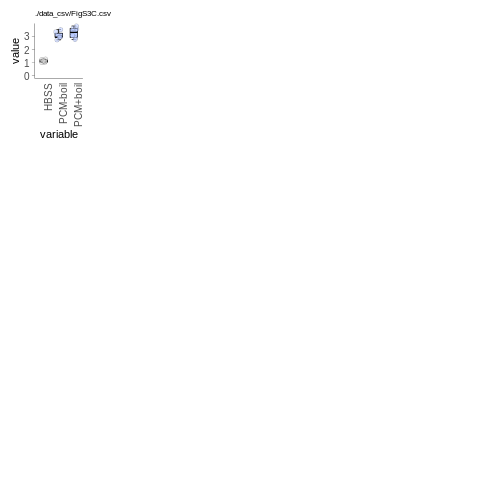

In [ ]:
# FigS3 ####################################

%%R
# FigS3C
csv_name = "./data_csv/FigS3C.csv"
dt <- read.csv(csv_name, header=T)
head(dt)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g <- makePlot_ver1(dt,'./columns_csv/FigS3C_columns.csv',3.8,10,color_c_box)

# Draw
# Adjusting plots
g <- wrap_plots(g,ncol = 9,nrow=7,widths=c(1))
plot(g)

# Save
ggsave(filename = "figS3.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")

# FigS.4

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



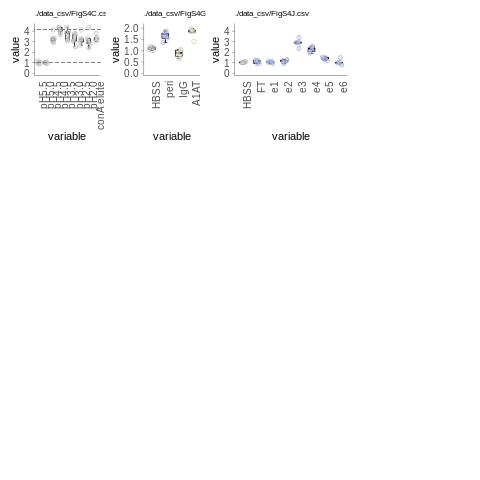

In [ ]:
# FigS4 ####################################

%%R
# FigS4C
csv_name = "./data_csv/FigS4C.csv"
dt1 <- read.csv(csv_name, header=T)
head(dt1)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#DDDDDD','#DDDDDD','#DDDDDD','#DDDDDD','#DDDDDD','#DDDDDD','#DDDDDD','#DDDDDD')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/FigS4C_columns.csv',5,10,color_c_box)+
      # Draw horizontal lines
      geom_segment(x=0, y=1, xend=length(dt1$variable), yend=1, linetype="dashed", size = 0.15,color='gray50')+
      geom_segment(x=0, y=4.14, xend=length(dt1$variable), yend=4.14, linetype="dashed", size = 0.15,color='gray50')+
      # Increase number of y-axis ticks
      scale_y_continuous(n.breaks = 6,limits = c(0, 4.5))

# FigS4G
csv_name = "./data_csv/FigS4G.csv"
dt2 <- read.csv(csv_name, header=T)
head(dt2)

# Filling boxplot with custom colors
color_c_box = c('#fbf3d7','#DDDDDD','#fbf3d7','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/FigS4G_columns.csv',2.1,10,color_c_box)+
      # Increase number of y-axis ticks
      scale_y_continuous(n.breaks = 5,limits = c(0, 2.1))

# FigS4J
csv_name = "./data_csv/FigS4J.csv"
dt3 <- read.csv(csv_name, header=T)
head(dt3)

# Filling boxplot with custom colors
color_c_box = c('#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF','#DDDDDD')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g3 <- makePlot_ver1(dt3,'./columns_csv/FigS4J_columns.csv',4.5,10,color_c_box)


# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,g3,ncol = 5,nrow=6,widths=c(1/1.2,1/1.4,2/1.4),heights=c(0.8,1,1,1,1,1))
plot(g)
# Save
ggsave(filename = "figS4.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")

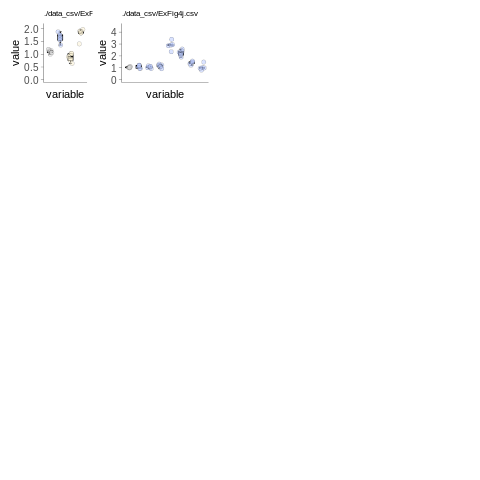

In [ ]:
%%R
# Draw
# Adjusting plots
g <- wrap_plots(g2,g3,ncol = 6,nrow=6,widths=c(0.4,0.8),heights=c(0.8,1,1,1,1,1))
plot(g)
# Save
#ggsave(filename = "ExFig4-2.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")

# FigS.6

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



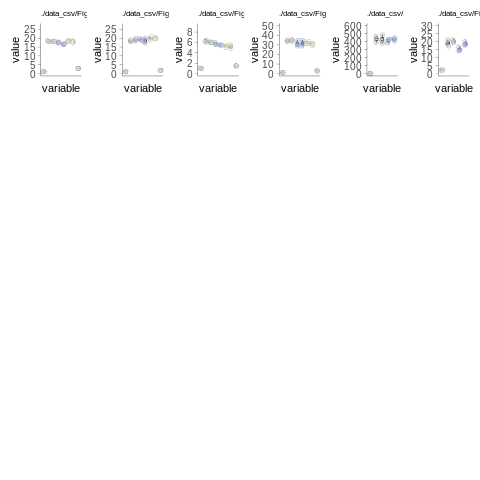

In [ ]:
# FigS6 ####################################

%%R
# FigS6A
csv_name = "./data_csv/FigS6A.csv"

dt1 <- read.csv(csv_name, header=T)
head(dt1)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#DDDDDD','#DDDDDD','#fbf3d7','#fbf3d7','#BBCCFF','#BBCCFF','#f2d5db')


# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/FigS6A_columns.csv',27,0,color_c_box)
# Increase number of y-axis ticks
g1 <- g1 + 
scale_y_continuous(n.breaks = 7,limits = c(0, 27))

# FigS6B
csv_name = "./data_csv/FigS6B.csv"
dt2 <- read.csv(csv_name, header=T)
head(dt2)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#DDDDDD','#DDDDDD','#fbf3d7','#fbf3d7','#BBCCFF','#BBCCFF','#f2d5db')

# makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/FigS6B_columns.csv',27,0,color_c_box)

# Increase number of y-axis ticks
g2 <- g2 + 
scale_y_continuous(n.breaks = 7,limits = c(0, 27))


# FigS6C
csv_name = "./data_csv/FigS6C.csv"
dt3 <- read.csv(csv_name, header=T)
head(dt3)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#DDDDDD','#DDDDDD','#fbf3d7','#fbf3d7','#BBCCFF','#BBCCFF','#f2d5db')

#makePlot_ver1(dt,'***_columns.csv',yaxis_max,label_fontsize,color_c_box)
g3 <- makePlot_ver1(dt3,'./columns_csv/FigS6C_columns.csv',9.2,0,color_c_box)
# Increase number of y-axis ticks
g3 <- g3 + 
scale_y_continuous(n.breaks = 7,limits = c(0, 9.2))

# FigS6D
csv_name = "./data_csv/FigS6D.csv"
dt4 <- read.csv(csv_name, header=T)
head(dt4)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#DDDDDD','#DDDDDD','#fbf3d7','#fbf3d7','#BBCCFF','#BBCCFF','#f2d5db')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g4 <- makePlot_ver1(dt4,'./columns_csv/FigS6D_columns.csv',50,0,color_c_box)

# FigS6E
csv_name = "./data_csv/FigS6E.csv"
dt5 <- read.csv(csv_name, header=T)
head(dt5)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF','#BBCCFF','#DDDDDD','#DDDDDD','#DDDDDD')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g5 <- makePlot_ver1(dt5,'./columns_csv/FigS6E_columns.csv',600,0,color_c_box)

# Increase number of y-axis ticks
g5 <- g5 + scale_y_continuous(n.breaks = 7,limits = c(0, 600))


# FigS6F
csv_name = "./data_csv/FigS6F.csv"
dt6 <- read.csv(csv_name, header=T)
head(dt6)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF','#BBCCFF','#DDDDDD','#DDDDDD','#DDDDDD')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g6 <- makePlot_ver1(dt6,'./columns_csv/FigS6F_columns.csv',28,0,color_c_box)

# Increase number of y-axis ticks
g6 <- g6 + scale_y_continuous(n.breaks = 7,limits = c(0, 30))



# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,g3,g4,g5,g6,ncol =6,nrow=6,widths=c(1,1,1,1,0.75,0.75),heights=c(0.7,1,1,1,1,1))
plot(g)
# Save
#ggsave(filename = "figS6.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")



# FigS.7

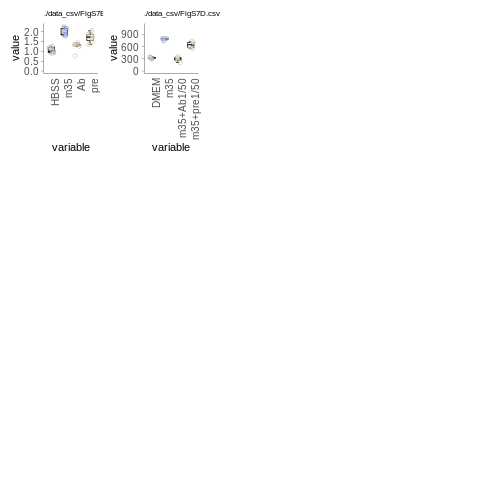

In [ ]:
# ExFig7 ####################################

%%R
# FigS7B
csv_name = "./data_csv/FigS7B.csv"
dt1 <- read.csv(csv_name, header=T)
head(dt1)

# Filling boxplot with custom colors
color_c_box = c('#fbf3d7','#DDDDDD','#BBCCFF','#fbf3d7')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/FigS7B_columns.csv',2.3,10,color_c_box)

# FigS7D
csv_name = "./data_csv/FigS7D.csv"
dt2 <- read.csv(csv_name, header=T)
head(dt2)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF','#fbf3d7','#fbf3d7')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/FigS7D_columns.csv',1108,10,color_c_box)


# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,ncol =7,nrow=6,widths=c(1,1,1,1,1),heights=c(0.75,1,1,1))
plot(g)
# Save
#ggsave(filename = "figS7.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")


# FigS.8

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



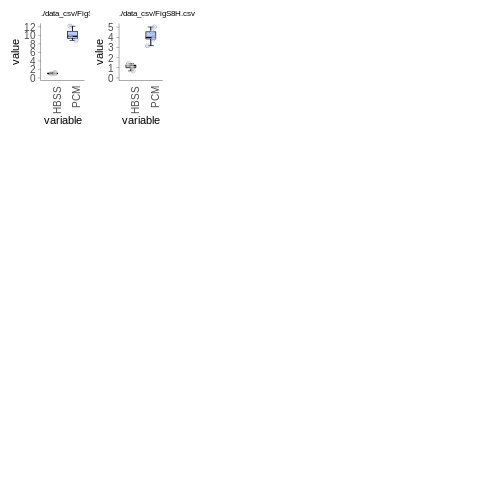

In [ ]:
# ExFig8 ####################################

%%R
# FigS8F
csv_name = "./data_csv/FigS8F.csv"
dt1 <- read.csv(csv_name, header=T)
head(dt1)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/FigS8F_columns.csv',12.2,10,color_c_box)+
  scale_y_continuous(n.breaks = 8,limits = c(0, 12.2))

# FigS8H
csv_name = "./data_csv/FigS8H.csv"
dt2 <- read.csv(csv_name, header=T)
head(dt2)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/FigS8H_columns.csv',5.1,10,color_c_box)+
  scale_y_continuous(n.breaks = 6,limits = c(0, 5.1))


# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,ncol = 9,nrow=7,widths=c(1,1,1),heights=c(1,1,1,1,1,1))
plot(g)
# Save
#ggsave(filename = "figS8.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")

# FigS.9

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



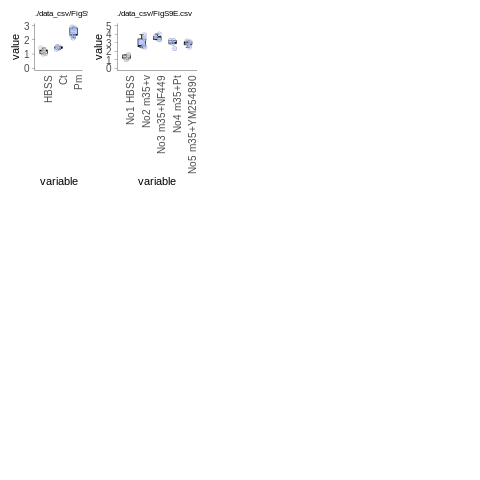

In [ ]:
# ExFig9 ####################################

%%R
# FigS9C
csv_name = "./data_csv/FigS9C.csv"
dt1 <- read.csv(csv_name, header=T)
head(dt1)

# Filling boxplot with custom colors
color_c_box = c('#BBCCFF','#DDDDDD','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g1 <- makePlot_ver1(dt1,'./columns_csv/FigS9C_columns.csv',3,10,color_c_box)

# FigS9E
csv_name = "./data_csv/FigS9E.csv"
dt2 <- read.csv(csv_name, header=T)
head(dt2)

# Filling boxplot with custom colors
color_c_box = c('#DDDDDD','#BBCCFF','#BBCCFF','#BBCCFF','#BBCCFF')

# makePlot_ver1(dt,'***_columns.csv',ratio,yaxis_max,label_fontsize,color_c_box)
g2 <- makePlot_ver1(dt2,'./columns_csv/FigS9E_columns.csv',4.5,10,color_c_box)+
      # Increase number of y-axis ticks
      scale_y_continuous(n.breaks = 7,limits = c(0, 5))

# Draw
# Adjusting plots
g <- wrap_plots(g1,g2,ncol = 7,nrow=7,widths=c(1,1.67,1),heights=c(1,1,1,1,1,1))
plot(g)
# Save
#ggsave(filename = "figS9.pdf", plot=g,width=8.27, height=11.69, device="pdf",  units="in")

In [ ]:
# Optional: Change file names using correspondence table

import shutil
#os.getcwd()
#os.makedirs('./data_csv')
#os.makedirs('./columns_csv')

# Read correspondance table from excel sheet
excel_name = "対応表2.xlsx"
sheet_num =0

# Read dataframe
df = makeDfFromAllSheet(excel_name,sheet_num)
df.head(50)
df['Figure'][0]
df['data'][0]
df['columns'][0]

# Change file names
#for i in range(0, 44):
#  shutil.copy('./data_csv_old/'+df['data'][i], './data_csv/'+df['Figure'][i]+'.csv')
#  shutil.copy('./columns_csv_old/'+df['columns'][i], './columns_csv/'+df['Figure'][i]+'_columns.csv')